# Audio Chunking
### Machine Shop Audio Source Data
Last Modified November 22, 2019

In [18]:
from __future__ import print_function
import matplotlib
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
from IPython.display import SVG
import scipy.io.wavfile as wavfile
import pandas as pd
import numpy as np
import os
import crepe
import sklearn
from scipy.io import wavfile
from sklearn import preprocessing
import pickle
np.set_printoptions(suppress=True)
import librosa
import resampy
from os import listdir
import os.path
from os.path import isfile, join
import pandas as pd
import seaborn as sns
import pandas as pd

In [19]:
#Define folder paths
cwd = "D:\\"
root = os.path.join(cwd, "machineshop")
os.chdir(root)
os.getcwd()

'D:\\machineshop'

### Ingest, Resample and Slice Audio Data

In [20]:
# # Change from mp3 to wav file
# from pydub import AudioSegment
# for subdir, dirs, files in os.walk(root):
#     for file in files:
#         filepath = subdir + os.sep + file
#         if filepath.endswith(".mp3"):
#             sound = AudioSegment.from_mp3(filepath)
#             filepath1 = os.path.splitext(filepath)[0] + '.wav'
#             sound.export(filepath1, format="wav")

In [21]:
# change sample rate to 32000
resample_rate = 32000
for subdir, dirs, files in os.walk(root):
    for file in files:
        filepath = subdir + os.sep + file
        if filepath.endswith(".wav"):
            fs, data = wavfile.read(filepath)
            y = resampy.resample(data, fs, resample_rate)
            wavfile.write(filepath, resample_rate, y)

In [22]:
# Get list of files at this folder location
import glob
filelist = glob.glob("*.wav")
print(filelist[1])

MachineShop_2019_9_fast_191011_132206fast.wav


MachineShop_2019_9_fast_191011_132206fast.wav


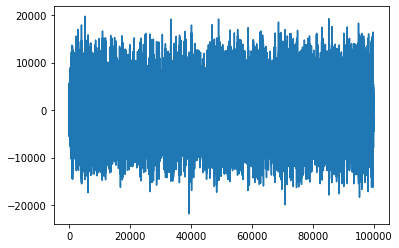

In [23]:
filename = filelist[1]
fs, data = wavfile.read(filename)
print(filename1)
plt.plot(data[0:100000,])
plt.show()

In [32]:
#Define folder paths
cwd = "D:\\"
audiotype = "machineshop"
machineshop_source = os.path.join(cwd, audiotype,"original-source")
machineshop_1sec_clips = os.path.join(cwd, audiotype,"clips_1_sec")

if not os.path.exists(machineshop_source):
    os.makedirs(machineshop_source)
if not os.path.exists(machineshop_1sec_clips):
    os.makedirs(machineshop_1sec_clips)

os.chdir(machineshop_source)
os.getcwd()

'D:\\machineshop\\original-source'

### Slice Audio to Desired Lengths

In [33]:
def _slice_audio_data(raw_audio_data, interval_len=1):
    accounted_fs = int(32000 * interval_len)
    num_slices = int(len(raw_audio_data) / accounted_fs)
    audio_data = raw_audio_data[: int(num_slices * accounted_fs)]  # Trims audio array
    sliced_audio = np.split(audio_data, num_slices)
    return np.array(sliced_audio)

In [34]:
audio_source = machineshop_source
chunked_1_sec = machineshop_1sec_clips

os.chdir(audio_source)
for subdir, dirs, files in os.walk(audio_source):
    for file in files:
        filepath = subdir + os.sep + file
        if filepath.endswith(".wav"):
            fs, data = wavfile.read(filepath)
            sliced_audio = _slice_audio_data(data, 1)
            sliced_audio = sliced_audio[0:60,:]
            os.chdir(chunked_1_sec)
            for i in range(sliced_audio.shape[0]):
                num = str(i)
                wavfile.write(file+"-"+num, resample_rate, sliced_audio[i,:])


In [35]:
# Manual apportioning of enire flights to train and test.

In [107]:
#Define folder paths
cwd = "D:\\"

chunked_1_sec_train = os.path.join(cwd, machineshop_1sec_clips,"machineshop_1_sec_train")
chunked_1_sec_test = os.path.join(cwd, machineshop_1sec_clips,"machineshop_1_sec_test")

if not os.path.exists(chunked_1_sec_train):
    os.makedirs(chunked_1_sec_train)
if not os.path.exists(chunked_1_sec_test):
    os.makedirs(chunked_1_sec_test)

In [108]:
print(chunked_1_sec_train)
print(chunked_1_sec_test)

D:\machineshop\clips_1_sec\machineshop_1_sec_train
D:\machineshop\clips_1_sec\machineshop_1_sec_test


In [109]:
array_currentsample_1_sec_train = []
array_currentsample_1_sec_test = []
array_currentsample_1_sec_train 

[]

In [110]:


count = 0
for subdir, dirs, files in os.walk(chunked_1_sec_train):
    for file in files:
        filepath = subdir + os.sep + file
        fs, raw_audio = wavfile.read(filepath)
        count = count +1
        array_currentsample_1_sec_train.append((raw_audio))
print("array_currentsample_1_sec_train", count)
train_row_count = count

count = 0
for subdir, dirs, files in os.walk(chunked_1_sec_test):
    for file in files:
        filepath = subdir + os.sep + file
        fs, raw_audio = wavfile.read(filepath)
        count = count +1
        array_currentsample_1_sec_test.append((raw_audio))
print("array_currentsample_1_sec_test", count)
test_row_count = count

array_currentsample_1_sec_train 158
array_currentsample_1_sec_test 34


In [111]:
train_row_count

158

In [120]:
# Convert from nested list to array
array_currentsample_1_sec_train = np.asarray(array_currentsample_1_sec_train)
new_array_currentsample_1_sec_train = np.empty((32000), int)

for row in range(1,train_row_count,1):
    newrow = array_currentsample_1_sec_train[row]
    new_array_currentsample_1_sec_train = np.vstack([array_currentsample_1_sec_train, newrow])
       
new_array_currentsample_1_sec_train = np.array(new_array_currentsample_1_sec_train)
new_array_currentsample_1_sec_train.shape

(159, 32000)

In [121]:
# Convert from nested list to array
array_currentsample_1_sec_test = np.asarray(array_currentsample_1_sec_test)
new_array_currentsample_1_sec_test = np.empty((32000), int)

for row in range(1,test_row_count,1):
    newrow = array_currentsample_1_sec_test[row]
    new_array_currentsample_1_sec_test = np.vstack([array_currentsample_1_sec_test, newrow])
       
new_array_currentsample_1_sec_test = np.array(new_array_currentsample_1_sec_test)
new_array_currentsample_1_sec_test.shape

(35, 32000)

### Save Chunked Audio Locally

In [122]:
os.chdir("D:\\machineshop")
print(os.getcwd())

np.savetxt('new_array_currentsample_1_sec_test.txt', new_array_currentsample_1_sec_test, delimiter=',')
np.savetxt('new_array_currentsample_1_sec_train.txt', new_array_currentsample_1_sec_train, delimiter=',')

D:\machineshop


### Inspect Audio

In [123]:
len(new_array_currentsample_1_sec_test)

new_array_currentsample_1_sec_train = new_array_currentsample_1_sec_train.astype(float)
new_array_currentsample_1_sec_test = new_array_currentsample_1_sec_test.astype(float)


In [124]:
D_left_new_array_currentsample_1_sec_train = np.abs(librosa.core.ifgram(new_array_currentsample_1_sec_train[20,:], center=False))
D_left_new_array_currentsample_1_sec_train.shape

(2, 1025, 59)

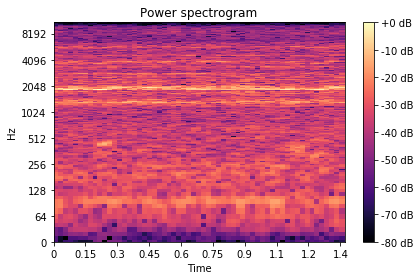

In [125]:
import librosa.display
import matplotlib.pyplot as plt
librosa.display.specshow(librosa.amplitude_to_db(D_left_new_array_currentsample_1_sec_train[1,:,:], ref=np.max),
                          y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()